In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime


In [85]:
# read the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


### Check for missing values

In [86]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [87]:
# check for incorrect values
# Check for negative values in Sales and Units columns
negative_sales = df[df["Sales"] < 0]
negative_units = df[df["Unit"] < 0]
print("Records with negative sales:", len(negative_sales))
print("Records with negative units:", len(negative_units))

Records with negative sales: 0
Records with negative units: 0


**Observations**
- No missing values
- No incorrect values

In [88]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


**Initial Observations**

1. The dataset contains 7,560 records for both Unit and Sales columns.

2. Units sold:
   - Average units per transaction: 18 units
   - Median (50th percentile): 14 units
   - Range: 2 units (min) to 65 units (max)
   - Standard deviation: ~13 units shows moderate variability

3. Sales amounts:
   - Average sale: AUD 45,013.56
   - Median sale: AUD 35,000
   - Range: AUD 5,000 (min) to AUD 162,500 (max) 
   - Standard deviation: AUD 32,253.51 indicates high variability in sales amounts

4. Distribution:
   - Both Units and Sales show right-skewed distributions since mean > median
   - 50% of transactions fall between 8-26 units and AUD 20,000-65,000 in sales


In [89]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [90]:
from sklearn.preprocessing import MinMaxScaler

# Selecting the numerical columns for normalization
numerical_cols = ['Unit', 'Sales']

# Applying MinMaxScaler for normalization
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df_normalized)

             Date        Time State     Group      Unit     Sales
0      1-Oct-2020     Morning    WA      Kids  0.095238  0.095238
1      1-Oct-2020     Morning    WA       Men  0.095238  0.095238
2      1-Oct-2020     Morning    WA     Women  0.031746  0.031746
3      1-Oct-2020     Morning    WA   Seniors  0.206349  0.206349
4      1-Oct-2020   Afternoon    WA      Kids  0.015873  0.015873
...           ...         ...   ...       ...       ...       ...
7555  30-Dec-2020   Afternoon   TAS   Seniors  0.190476  0.190476
7556  30-Dec-2020     Evening   TAS      Kids  0.206349  0.206349
7557  30-Dec-2020     Evening   TAS       Men  0.206349  0.206349
7558  30-Dec-2020     Evening   TAS     Women  0.142857  0.142857
7559  30-Dec-2020     Evening   TAS   Seniors  0.174603  0.174603

[7560 rows x 6 columns]


In [91]:
# Performing descriptive statistical analysis on 'Sales' and 'Unit' columns
descriptive_stats_sales = df['Sales'].describe()
descriptive_stats_unit = df['Unit'].describe()

# Calculating mode separately as 'describe()' doesn't include mode
mode_sales = df_normalized['Sales'].mode()[0]
mode_unit = df_normalized['Unit'].mode()[0]

descriptive_stats_sales, mode_sales, descriptive_stats_unit, mode_unit

(count      7560.000000
 mean      45013.558201
 std       32253.506944
 min        5000.000000
 25%       20000.000000
 50%       35000.000000
 75%       65000.000000
 max      162500.000000
 Name: Sales, dtype: float64,
 np.float64(0.1111111111111111),
 count    7560.000000
 mean       18.005423
 std        12.901403
 min         2.000000
 25%         8.000000
 50%        14.000000
 75%        26.000000
 max        65.000000
 Name: Unit, dtype: float64,
 np.float64(0.1111111111111111))

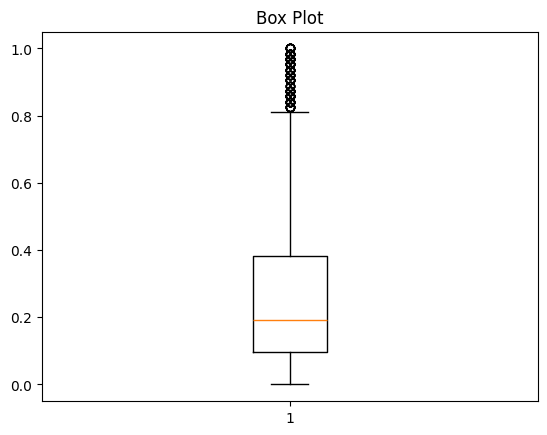

In [92]:
#BoX plot for SAlES
plt.boxplot(df_normalized['Sales'])
plt.title("Box Plot")
plt.show()

**Observations**

-Distribution Components
  - **Box (IQR)**: 
    - Q1 (lower quartile): ~0.1
    - Median: ~0.2
    - Q3 (upper quartile): ~0.4
    - IQR (box height): ~0.3

- Distribution Characteristics
  - **Skewness**: Strong positive skew (right-skewed)
    - Median closer to Q1 than Q3
    - Long upper whisker compared to lower whisker
  - **Spread**: 
    - Compact distribution in lower values (0-0.2)
    - More spread out in upper values
    - Upper whisker extends to ~0.8

- Outliers
  - Dense concentration of outlier points
  - All outliers are above the upper whisker
  - No outliers below the lower whisker

- Key Observations
  - Strong indication of right-tailed distribution
  - Significant number of extreme values near maximum

### Grouping total sales by state and by groups

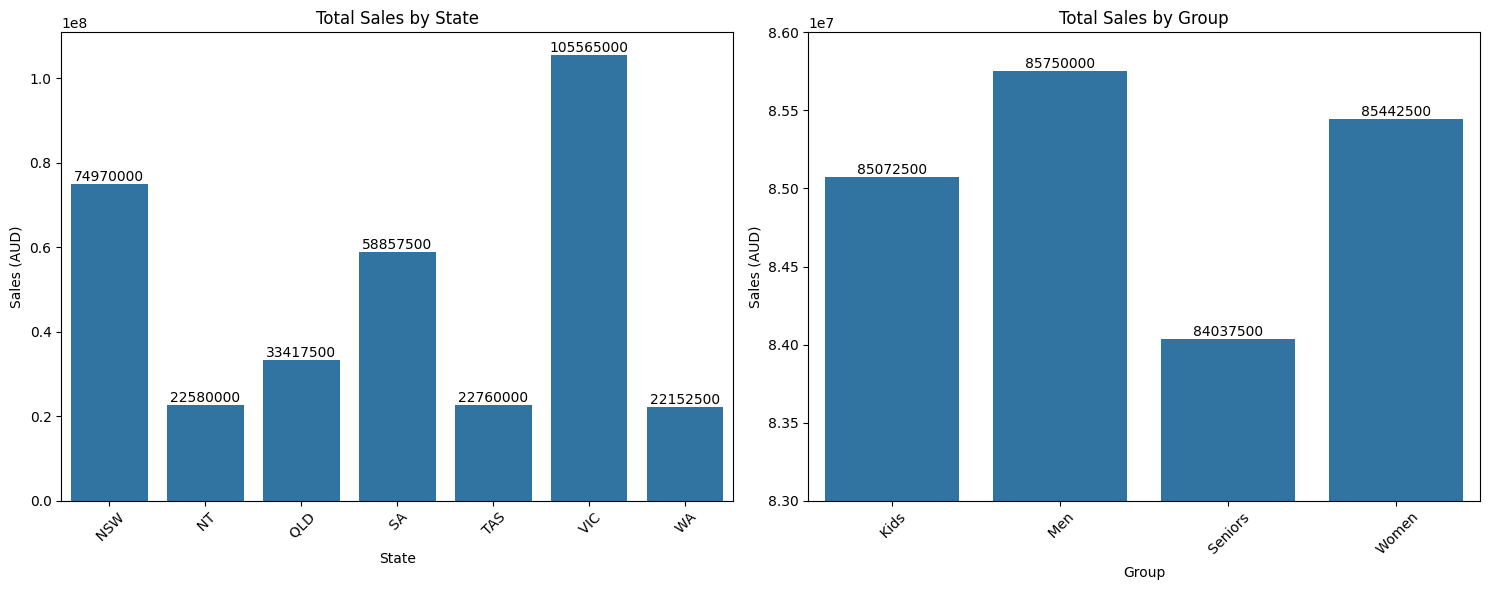

In [93]:
# Create a figure with two subplots side by side
plt.figure(figsize=(15,6))

# Sales by State
plt.subplot(1,2,1)
sales_by_state = df.groupby('State')['Sales'].sum()
ax = sns.barplot(x=sales_by_state.index, y=sales_by_state.values)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Sales (AUD)')
plt.xticks(rotation=45)

# Add value labels on top of each bar
ax.bar_label(ax.containers[0], fmt='%.0f')

# Sales by Group
plt.subplot(1,2,2)
sales_by_group = df.groupby('Group')['Sales'].sum()
ax1 = sns.barplot(x=sales_by_group.index, y=sales_by_group.values)
plt.title('Total Sales by Group')
plt.xlabel('Group')
plt.ylabel('Sales (AUD)')
plt.xticks(rotation=45)

# Add value labels on top of each bar
ax1.bar_label(ax1.containers[0], fmt='%.0f')
# Set y-axis to start from 83M to better show differences
plt.ylim(83000000, 86000000)
plt.tight_layout()
plt.show()

**Observations**

Based on the total sales:
- The group generating the highest sales is "Men" with a total of $85,750,000.
- The group with the lowest sales is "Seniors" with a total of $84,037,500. Regarding sales by state:
- The state with the highest sales is Victoria (VIC) with a total of $105,565,000.
The state with the lowest sales is Western Australia (WA) with a total of $22,152,500.

In [ ]:
# Converting 'Date' to datetime and setting it as index for easier resampling
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

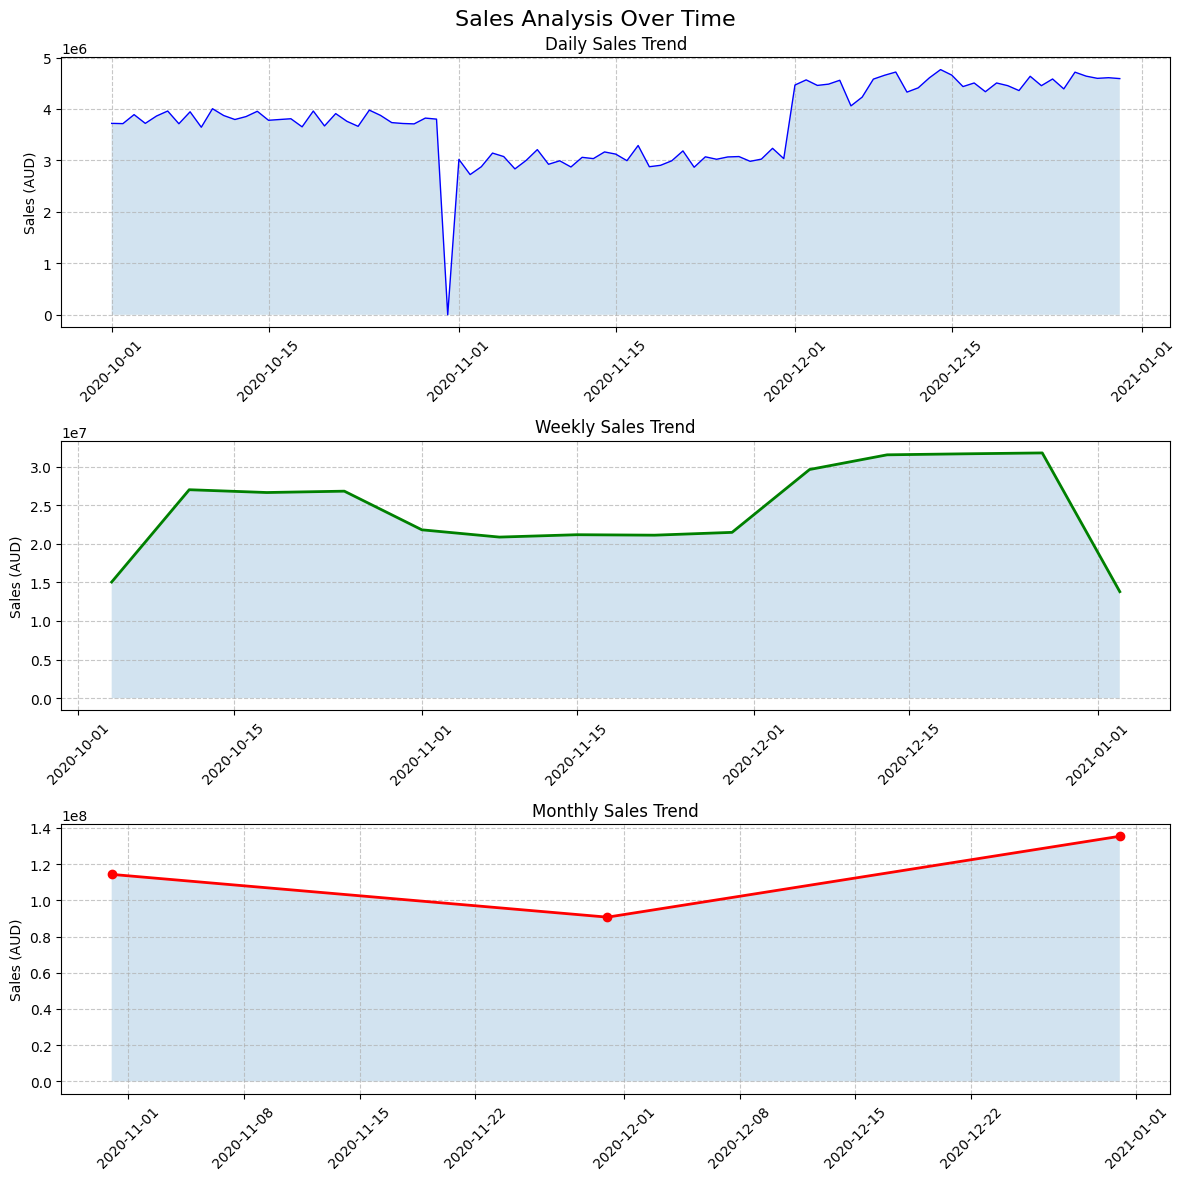

In [95]:

# Generating weekly, monthly, and quarterly reports
daily_report = df.resample('D').sum()[['Sales', 'Unit']]
weekly_report = df.resample('W').sum()[['Sales', 'Unit']]
monthly_report = df.resample('ME').sum()[['Sales', 'Unit']]
quarterly_report = df.resample('QE').sum()[['Sales', 'Unit']]

# Create figure and axis objects with subplots()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle('Sales Analysis Over Time', fontsize=16)

# Daily Sales
ax1.plot(daily_report.index, daily_report['Sales'], color='blue', linewidth=1)
ax1.fill_between(daily_report.index, daily_report['Sales'], alpha=0.2)
ax1.set_title('Daily Sales Trend')
ax1.set_ylabel('Sales (AUD)')
ax1.grid(True, linestyle='--', alpha=0.7)

# Weekly Sales
ax2.plot(weekly_report.index, weekly_report['Sales'], color='green', linewidth=2)
ax2.fill_between(weekly_report.index, weekly_report['Sales'], alpha=0.2)
ax2.set_title('Weekly Sales Trend')
ax2.set_ylabel('Sales (AUD)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Monthly Sales
ax3.plot(monthly_report.index, monthly_report['Sales'], color='red', linewidth=2, marker='o')
ax3.fill_between(monthly_report.index, monthly_report['Sales'], alpha=0.2)
ax3.set_title('Monthly Sales Trend')
ax3.set_ylabel('Sales (AUD)')
ax3.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**Observation**

- Daily Sales Trends
  - **Initial Level**: ~3.8M AUD daily average in October
  - **Major Events**:
    - Sharp drop to near-zero in early November
    - Recovery to ~3.0M AUD mid-November
    - Significant jump to ~4.5M AUD in December
  - **Stability**: More volatile daily fluctuations throughout the period

- Weekly Sales Pattern
  - **Starting Point**: ~15M AUD (Week 40)
  - **Mid-Quarter**: Relatively stable at ~20-22M AUD
  - **End-Quarter Surge**: 
  - Steady climb from December
  - Peak at ~31M AUD (Weeks 51-52)
  - Sharp decline entering 2021

- Monthly Performance
  - **October**: ~115M AUD (Strong start)
  - **November**: ~90M AUD (Lowest, affected by early-month drop)
  - **December**: ~135M AUD (Highest, holiday season impact)
  - **Trend**: Clear V-shaped recovery from November to December

- Key Observations
  - **Seasonal Impact**: Strong holiday season effect visible across all timeframes
  - **Recovery Pattern**: Quick recovery from November disruption
  - **Scale Consistency**: All three views (daily/weekly/monthly) show aligned trends
  - **Year-End Performance**: Strongest performance in December, indicating successful holiday season
  - **Data Granularity**: Daily data shows micro-events hidden in weekly/monthly views

- Business Implications
  - Critical importance of November-December transition period
  - Resilience in recovery from major disruptions
  - Significant holiday season opportunity for sales optimization

# Recommendations

## Targeted Sales Programs
- **Focus Areas**: Implement tailored sales programs in states with lower sales, such as Western Australia (WA), Northern Territory (NT), and Tasmania (TAS), to boost revenue.

## Demographic-Specific Marketing
- **Enhance Efforts**: Increase marketing efforts towards the "Seniors" group, which has the lowest sales among demographics.
- **Capitalize on Strengths**: Continue leveraging the high sales from the "Men" and "Women" groups.

## Time-Based Promotions
- **Strategic Timing**: Utilize time-of-day specific promotions to maximize sales during peak periods identified in the analysis.

## Visual Insight
- The chart in the notebook illustrates the sales distribution by state and group, highlighting areas for potential growth and focus.

This comprehensive analysis, supported by visual insights, will assist the Head of Sales & Marketing in making informed, data-driven decisions to enhance AAL's sales strategy for the upcoming year.